In [1]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym 
import gym_minigrid
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, HTML, display
import imageio
import imageio_ffmpeg
import time
import base64  

In [2]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.3
        self.gamma = 0.99
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return tuple(s.flatten())
        
    def update(self, state, action, reward, next_state):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        next_q_value = max(self.q_values[next_state])
        
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action

In [3]:
def gen_wrapped_env():
    env = gym.make('MiniGrid-LavaCrossingS9N1-v0')
    env = gym_minigrid.wrappers.FullyObsWrapper(env)
    return env

In [4]:
def train_qlearning_on_minigrid(episodes=10000):
    env = gen_wrapped_env()
    agent = QLearning(actions=env.action_space.n)
    rewards = []
    frames = []
    
    for episode in range(episodes):
        state = env.reset()['image']
        total_reward = 0
        done = False
        
        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            next_state = next_state['image']
            agent.update(state, action, reward, next_state)
            state = next_state
            total_reward += reward

            if episode == episodes - 1:
                frames.append(env.render(mode='rgb_array'))
        
        rewards.append(total_reward)
        
        if (episode + 1) % 10 == 0:
            avg_reward = np.mean(rewards[-10:])
            print(f'Episode {episode + 1}/{episodes}, Average Reward: {avg_reward}')
    
    create_video(frames, "minigrid_crossing.mp4")
    
    plt.plot(pd.Series(rewards).rolling(10).mean())
    plt.xlabel('Episode')
    plt.ylabel('Average Reward (10 Episodes)')
    plt.title('Training Progress')
    plt.show()


In [5]:
def create_video(frames, output_file):
    with imageio.get_writer(output_file, fps=15) as writer:
        for frame in frames:
            writer.append_data(frame)
    display_video(output_file)

def display_video(filename):
    video = open(filename, "rb").read()
    encoded_video = base64.b64encode(video).decode() 
    display_html = f"""
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{encoded_video}" type="video/mp4">
    </video>
    """
    display(HTML(display_html))

Episode 10/1000, Average Reward: 0.0
Episode 20/1000, Average Reward: 0.0
Episode 30/1000, Average Reward: 0.0
Episode 40/1000, Average Reward: 0.0
Episode 50/1000, Average Reward: 0.0
Episode 60/1000, Average Reward: 0.0
Episode 70/1000, Average Reward: 0.0
Episode 80/1000, Average Reward: 0.0
Episode 90/1000, Average Reward: 0.0
Episode 100/1000, Average Reward: 0.0
Episode 110/1000, Average Reward: 0.0
Episode 120/1000, Average Reward: 0.0
Episode 130/1000, Average Reward: 0.0
Episode 140/1000, Average Reward: 0.0
Episode 150/1000, Average Reward: 0.0
Episode 160/1000, Average Reward: 0.0
Episode 170/1000, Average Reward: 0.0
Episode 180/1000, Average Reward: 0.0
Episode 190/1000, Average Reward: 0.0
Episode 200/1000, Average Reward: 0.0
Episode 210/1000, Average Reward: 0.0
Episode 220/1000, Average Reward: 0.0
Episode 230/1000, Average Reward: 0.0
Episode 240/1000, Average Reward: 0.0
Episode 250/1000, Average Reward: 0.0
Episode 260/1000, Average Reward: 0.0
Episode 270/1000, Ave

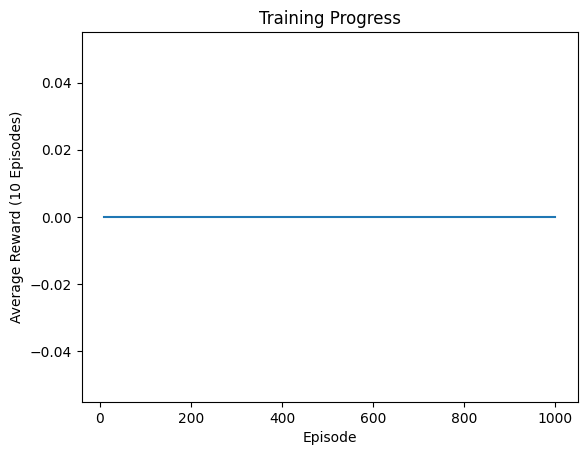

In [6]:
train_qlearning_on_minigrid(episodes=1000)